## Can housing age possibly be a factor in how severe the fire is or even be the cause of why a  fire happens. 
* For instance old applicances, old electric, bad fire preventions or other things might be the cause
* We look at when houses are built and see if there is correlation with older houses and fire incidents
* When only looking at the fire incidents, can we see correlation with borough that have old houses ?

In [1]:
# read in the data 
# Import necessary libraries and apply settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from IPython.display import Image
%matplotlib inline

file = 'House_Ages/tables/E37000023.csv'
file2 = '2011_OA-LSOA-MSOA-LA.csv'
df = pd.read_csv(file, encoding='iso-8859-1')
df_convert = pd.read_csv(file2, encoding='us-ascii')

In [4]:
# Load the previously cleaned dataset
incidents = pd.read_csv('fire_incidents2020.csv')#pd.read_csv('fire_incidents1year.csv')
incidents = incidents.append(pd.read_csv('fire_incidents2019.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2018.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2017.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2016.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2015.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2014.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2013.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2012.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2011.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2010.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2009.csv'));

/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (52,83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,25,52,83) have mixed types.Specify dtype option o

The detail of the dataset is on the lsoa11cd code which is the ward code, this is reasonably specific location and even though the incidents dataset will loose half of it lines if the ward code is set as a condition, it will hopefully provide better context in the end.

In [58]:
# Convert the lsoa11cd values to borough code
df["BoroughCode"] = [df_convert[df_convert.LSOA11CD == x].iloc[1,:]["LAD11CD"] for x in df.lsoa11cd]
df['BoroughName'] = [df_convert[df_convert.LSOA11CD == x].iloc[1,:]["LAD11NM"] for x in df.lsoa11cd]

In [55]:
df_convert.head()

,OA11CD,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,Inner_Outer
0,E00000001,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,Inner London
1,E00000003,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,Inner London
2,E00000005,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,Inner London
3,E00000007,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,Inner London
4,E00000010,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,Inner London


In [144]:
# select the stats 
select_columns = ['BP_PRE_1900', 'BP_1900_1918', 'BP_1919_1929',
               'BP_1930_1939', 'BP_1945_1954', 'BP_1955_1964', 'BP_1965_1972',
               'BP_1973_1982', 'BP_1983_1992', 'BP_1993_1999', 'BP_2000_2009',
               'BP_2010_2015','BoroughName']
df_selected = df[select_columns]
df_selected = df_selected.groupby("BoroughName").sum().reset_index()
df_selected.head()

,BoroughName,BP_PRE_1900,BP_1900_1918,BP_1919_1929,BP_1930_1939,BP_1945_1954,BP_1955_1964,BP_1965_1972,BP_1973_1982,BP_1983_1992,BP_1993_1999,BP_2000_2009,BP_2010_2015
0,Barking and Dagenham,917,2313,28678,12072,6710,4486,4755,1772,1774,2755,4727,2499
1,Barnet,10327,21612,20150,33970,7055,8016,8621,7328,8811,5787,7621,4845
2,Bexley,6570,4001,3932,37592,6181,9907,6953,7302,5670,3458,2446,2065
3,Brent,26712,10336,14116,28333,3327,3078,4102,4134,4541,3921,8245,4277
4,Bromley,16868,7006,6049,36886,12165,13144,13060,11399,8022,2951,6416,3115


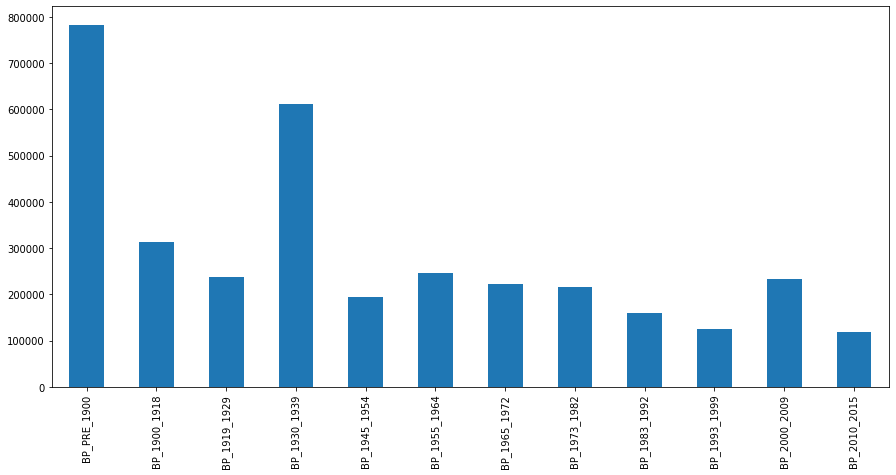

In [117]:
# CHange the column names to calculate average house age
# plot_values = df_selected.sum(axis = 0, skipna = True)
# plt.bar(plot_values.index,plot_values.values)
df_selected.iloc[: , 1:].sum().plot(kind='bar')

Here it can be seen how most of londons houses are built before the 1900 and then there was a big jump right before the WWII from 1930-1939.

In [6]:
plt.figure(figsize=(15,7))
x.plot.bar(stacked=True,figsize=(16,9))

NameError: name 'x' is not defined

<Figure size 1080x504 with 0 Axes>

In [142]:
df_selected.transpose()

BoroughName,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
BP_PRE_1900,917,10327,6570,26712,16868,50330,1410,30517,18110,13375,...,9880,36726,8623,17019,32589,4242,15304,26194,49787,57144
BP_1900_1918,2313,21612,4001,10336,7006,3962,82,15269,22906,15992,...,12981,11939,19739,14987,3551,6797,1633,22777,17734,5823
BP_1919_1929,28678,20150,3932,14116,6049,2812,51,10141,10314,8901,...,10682,3920,10920,8428,2173,8655,2095,9046,4204,2533
BP_1930_1939,12072,33970,37592,28333,36886,6919,60,29253,33749,36093,...,21537,2730,26095,12186,8357,26255,4098,12077,7327,11715
BP_1945_1954,6710,7055,6181,3327,12165,3698,151,6639,5305,5559,...,3873,3430,7482,2909,7976,2875,7206,4522,6550,5540
BP_1955_1964,4486,8016,9907,3078,13144,7645,340,14802,6271,8151,...,2239,8939,6259,5037,12434,4163,11177,4857,11432,6972
BP_1965_1972,4755,8621,6953,4102,13060,7732,2651,11543,7033,8231,...,3565,7210,3786,5979,11077,5377,10093,3568,9376,7275
BP_1973_1982,1772,7328,7302,4134,11399,7565,293,10041,8845,6178,...,4264,6520,2978,5179,10586,7220,9698,3078,7431,6997
BP_1983_1992,1774,8811,5670,4541,8022,3063,100,6828,5865,5916,...,4847,6356,4546,2898,8294,5106,8727,4471,5636,3714
BP_1993_1999,2755,5787,3458,3921,2951,3275,460,4021,3285,5514,...,2750,5805,3580,2659,6497,3531,10891,3037,4167,4076
